In [56]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Load Dataset
df = pd.read_csv("email.csv") 

In [58]:
df.columns = ["Category", "Message"]

# Convert labels to numeric (0 = ham, 1 = spam)
df["label"] = df["Category"].map({"ham": 0, "spam": 1})

# Ensure no missing values
df.dropna(inplace=True)

In [59]:
# Text Preprocessing (TF-IDF Vectorization)
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_tfidf = vectorizer.fit_transform(df["Message"])
y = df["label"]

In [60]:
# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)


In [61]:
# Split the data into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)



LogisticRegression()

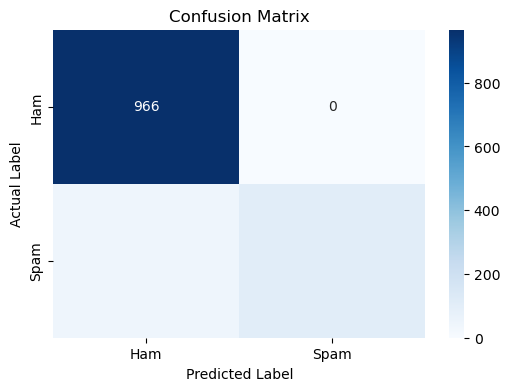

In [62]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [63]:
y_pred = lr_model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9623318385650225

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       966
         1.0       1.00      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

